# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [1]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [2]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
# In Pandas we can have eterogeneous values in a series and we can label the entries
# Time serieses: values as afunction of time, important for predictions.
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print ("xs:", xs,'\n')
print ("xs indexes:",xs.index,'\n')
# Values of the Series are actually a numpy array
# The values are a numpy array
print ("xs values:", xs.values, type(xs.values),'\n')
# The access is similar to the one of a dictionary, and they automatocally becomee a method
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')
print (type(xs[['d', 'f', 'h']]), '\n')

xs: a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

xs indexes: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 

<class 'pandas.core.series.Series'> 



In [3]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
# filter using a mask
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [4]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)



b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without considering whether the Series involved have the same labels.

In [5]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s)
# Operations not only by position but also by index
s = s[1:] + s[:-1]
print(s)

a    1.442172
b   -0.629328
c   -0.887396
d    0.274699
e    1.286788
dtype: float64
a         NaN
b   -1.258655
c   -1.774793
d    0.549398
e         NaN
dtype: float64


### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas has a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [6]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
print(date)
# The last entry is millisecond
date = dt.datetime(2021,11,22,12,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 22 2021'
# or alternatively
date = '22/11/2021 12:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2021-11-22
2021-11-22 12:45:10.000015
22/11/2021 12:45:00
DatetimeIndex(['2021-11-22 12:45:00', '2021-11-23 12:45:00',
               '2021-11-24 12:45:00', '2021-11-25 12:45:00',
               '2021-11-26 12:45:00', '2021-11-27 12:45:00',
               '2021-11-28 12:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2021-11-22 12:45:00', '2021-11-22 12:45:01',
               '2021-11-22 12:45:02', '2021-11-22 12:45:03',
               '2021-11-22 12:45:04', '2021-11-22 12:45:05',
               '2021-11-22 12:45:06', '2021-11-22 12:45:07',
               '2021-11-22 12:45:08', '2021-11-22 12:45:09',
               ...
               '2021-11-22 13:44:50', '2021-11-22 13:44:51',
               '2021-11-22 13:44:52', '2021-11-22 13:44:53',
               '2021-11-22 13:44:54', '2021-11-22 13:44:55',
               '2021-11-22 13:44:56', '2021-11-22 13:44:57',
               '2021-11-22 13:44:58', '2021-11-22 13:44:59'],
              dtype='datetime64[ns]', leng

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset.

Timestamp is the pandas equivalent of python’s Datetime and is interchangeable with it in most cases. 

In [7]:
# Timestamp and to_date time basically do the same thing
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9))

# internally it counts the nanoseconds from January 1st 19
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d')
print (type(ts))
print (ts.value)
ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print (ts)
print (ts.value)



1604880000000000000
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1289520000000000000
2010-11-12 00:00:00
1289520000000000000


A standard series can be created and (range of) elements can be used as indexes

In [8]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2021-11-22':'2021-11-23'], '\n') # Note - includes end time


2021-11-22 12:45:00    10.361300
2021-11-23 12:45:00     9.187586
2021-11-24 12:45:00    11.106057
2021-11-25 12:45:00    10.125673
Freq: D, dtype: float64 

2021-11-22 12:45:00    10.361300
2021-11-23 12:45:00     9.187586
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [ ]:
pd.to_datetime([1, 2, 3, 4], unit='D', origin=pd.Timestamp('1980-02-03'))

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [9]:
# A data frame is a collection of serires but can be much more complicated, for example can be multi-dimensional
entries=10
dates=pd.date_range('11/22/2021 12:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df


,A,B,C,D
2021-11-22 12:45:00,-1.062456,0.388083,-0.606841,0.478678
2021-11-22 13:45:00,1.198771,-0.047806,2.014069,-0.734269
2021-11-22 14:45:00,0.299835,1.058977,0.437354,0.771977
2021-11-22 15:45:00,0.622866,-1.089170,0.581155,0.774871
2021-11-22 16:45:00,1.990415,0.114716,1.307648,0.685786
2021-11-22 17:45:00,0.425148,-0.113895,-0.242510,-0.480820
2021-11-22 18:45:00,0.763006,-0.519825,0.820523,-0.540402
2021-11-22 19:45:00,0.109520,0.546732,-0.455588,-0.629692
2021-11-22 20:45:00,0.552740,-0.113555,-2.421821,-0.238919
2021-11-22 21:45:00,-1.598238,0.391338,-2.294259,0.041433


or by means of a dictionary:


In [10]:
df2 = pd.DataFrame(
    { 'A' : 1., # Broadcasting occurres 
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]), # Means string
    }
    )
df2
# If we pass arrays they a have to be of the same length
# check what happens if D and E had different lenghts 
# Bu default the indexes are 0, 1, 2...

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [11]:
df.head(2)

,A,B,C,D
2021-11-22 12:45:00,-1.062456,0.388083,-0.606841,0.478678
2021-11-22 13:45:00,1.198771,-0.047806,2.014069,-0.734269


In [12]:
df.tail(4)

,A,B,C,D
2021-11-22 18:45:00,0.763006,-0.519825,0.820523,-0.540402
2021-11-22 19:45:00,0.109520,0.546732,-0.455588,-0.629692
2021-11-22 20:45:00,0.552740,-0.113555,-2.421821,-0.238919
2021-11-22 21:45:00,-1.598238,0.391338,-2.294259,0.041433


In [13]:
df.index

DatetimeIndex(['2021-11-22 12:45:00', '2021-11-22 13:45:00',
               '2021-11-22 14:45:00', '2021-11-22 15:45:00',
               '2021-11-22 16:45:00', '2021-11-22 17:45:00',
               '2021-11-22 18:45:00', '2021-11-22 19:45:00',
               '2021-11-22 20:45:00', '2021-11-22 21:45:00'],
              dtype='datetime64[ns]', freq='H')

In [14]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [15]:
df.values

array([[-1.06245573,  0.38808254, -0.60684061,  0.47867839],
       [ 1.19877131, -0.04780619,  2.01406899, -0.73426885],
       [ 0.29983542,  1.05897691,  0.43735415,  0.77197704],
       [ 0.62286646, -1.08917005,  0.58115535,  0.77487086],
       [ 1.99041461,  0.11471581,  1.30764808,  0.68578641],
       [ 0.42514787, -0.11389482, -0.24251022, -0.48082033],
       [ 0.76300606, -0.51982468,  0.82052332, -0.54040197],
       [ 0.1095195 ,  0.54673239, -0.45558775, -0.6296924 ],
       [ 0.55273991, -0.11355525, -2.42182112, -0.23891874],
       [-1.598238  ,  0.39133759, -2.29425882,  0.04143345]])

In [16]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,0.330161,0.061559,-0.086027,0.012864
std,1.030115,0.594795,1.439836,0.615705
min,-1.598238,-1.089170,-2.421821,-0.734269
25%,0.157098,-0.113810,-0.569027,-0.525507
50%,0.488944,0.033455,0.097422,-0.098743
75%,0.727971,0.390524,0.760681,0.634009
max,1.990415,1.058977,2.014069,0.774871


In [17]:
df.T

,2021-11-22 12:45:00,2021-11-22 13:45:00,2021-11-22 14:45:00,2021-11-22 15:45:00,2021-11-22 16:45:00,2021-11-22 17:45:00,2021-11-22 18:45:00,2021-11-22 19:45:00,2021-11-22 20:45:00,2021-11-22 21:45:00
A,-1.062456,1.198771,0.299835,0.622866,1.990415,0.425148,0.763006,0.109520,0.552740,-1.598238
B,0.388083,-0.047806,1.058977,-1.089170,0.114716,-0.113895,-0.519825,0.546732,-0.113555,0.391338
C,-0.606841,2.014069,0.437354,0.581155,1.307648,-0.242510,0.820523,-0.455588,-2.421821,-2.294259
D,0.478678,-0.734269,0.771977,0.774871,0.685786,-0.480820,-0.540402,-0.629692,-0.238919,0.041433


In [18]:
df.sort_index(axis=0,ascending=True)

,A,B,C,D
2021-11-22 12:45:00,-1.062456,0.388083,-0.606841,0.478678
2021-11-22 13:45:00,1.198771,-0.047806,2.014069,-0.734269
2021-11-22 14:45:00,0.299835,1.058977,0.437354,0.771977
2021-11-22 15:45:00,0.622866,-1.089170,0.581155,0.774871
2021-11-22 16:45:00,1.990415,0.114716,1.307648,0.685786
2021-11-22 17:45:00,0.425148,-0.113895,-0.242510,-0.480820
2021-11-22 18:45:00,0.763006,-0.519825,0.820523,-0.540402
2021-11-22 19:45:00,0.109520,0.546732,-0.455588,-0.629692
2021-11-22 20:45:00,0.552740,-0.113555,-2.421821,-0.238919
2021-11-22 21:45:00,-1.598238,0.391338,-2.294259,0.041433


In [19]:
df.sort_values(by="C")
# They are considtent, the values of the rows associated to a value of C remains associated


,A,B,C,D
2021-11-22 20:45:00,0.552740,-0.113555,-2.421821,-0.238919
2021-11-22 21:45:00,-1.598238,0.391338,-2.294259,0.041433
2021-11-22 12:45:00,-1.062456,0.388083,-0.606841,0.478678
2021-11-22 19:45:00,0.109520,0.546732,-0.455588,-0.629692
2021-11-22 17:45:00,0.425148,-0.113895,-0.242510,-0.480820
2021-11-22 14:45:00,0.299835,1.058977,0.437354,0.771977
2021-11-22 15:45:00,0.622866,-1.089170,0.581155,0.774871
2021-11-22 18:45:00,0.763006,-0.519825,0.820523,-0.540402
2021-11-22 16:45:00,1.990415,0.114716,1.307648,0.685786
2021-11-22 13:45:00,1.198771,-0.047806,2.014069,-0.734269


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [20]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)

2021-11-22 12:45:00   -1.062456
2021-11-22 13:45:00    1.198771
2021-11-22 14:45:00    0.299835
2021-11-22 15:45:00    0.622866
2021-11-22 16:45:00    1.990415
2021-11-22 17:45:00    0.425148
2021-11-22 18:45:00    0.763006
2021-11-22 19:45:00    0.109520
2021-11-22 20:45:00    0.552740
2021-11-22 21:45:00   -1.598238
Freq: H, Name: A, dtype: float64 

2021-11-22 12:45:00   -1.062456
2021-11-22 13:45:00    1.198771
2021-11-22 14:45:00    0.299835
2021-11-22 15:45:00    0.622866
2021-11-22 16:45:00    1.990415
2021-11-22 17:45:00    0.425148
2021-11-22 18:45:00    0.763006
2021-11-22 19:45:00    0.109520
2021-11-22 20:45:00    0.552740
2021-11-22 21:45:00   -1.598238
Freq: H, Name: A, dtype: float64


In [21]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2021-11-22 12:45:00":"2021-11-22 14:45:00"])

                            A         B         C         D
2021-11-22 12:45:00 -1.062456  0.388083 -0.606841  0.478678
2021-11-22 13:45:00  1.198771 -0.047806  2.014069 -0.734269
2021-11-22 14:45:00  0.299835  1.058977  0.437354  0.771977
                            A         B         C         D
2021-11-22 12:45:00 -1.062456  0.388083 -0.606841  0.478678
2021-11-22 13:45:00  1.198771 -0.047806  2.014069 -0.734269
2021-11-22 14:45:00  0.299835  1.058977  0.437354  0.771977


### Selection by label

In [22]:
# getting a cross section (part of the DataFrame) using a label
# dates containes the indexes, so I'm selecting the first index
df.loc[dates[0]]
# We're not gonna get a dat frame but a series

A   -1.062456
B    0.388083
C   -0.606841
D    0.478678
Name: 2021-11-22 12:45:00, dtype: float64

In [23]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]
#a=df.loc[:,['A','B']]

,A,B
2021-11-22 12:45:00,-1.062456,0.388083
2021-11-22 13:45:00,1.198771,-0.047806
2021-11-22 14:45:00,0.299835,1.058977
2021-11-22 15:45:00,0.622866,-1.089170
2021-11-22 16:45:00,1.990415,0.114716
2021-11-22 17:45:00,0.425148,-0.113895
2021-11-22 18:45:00,0.763006,-0.519825
2021-11-22 19:45:00,0.109520,0.546732
2021-11-22 20:45:00,0.552740,-0.113555
2021-11-22 21:45:00,-1.598238,0.391338


In [ ]:
# showing label slicing, both endpoints are included:
df.loc['2021-11-22 16:45:00':'2021-11-22 18:45:00',['A','B']]

In [24]:
# getting an individual element
print (df.loc[dates[1],'A'])
# They're not exactly a method so they have not parenthesis
# equivalently
print (df.at[dates[1],'A'])

1.198771306860233
1.198771306860233


### Selecting by position

In [25]:
# select via the position of the passed integers:
# Takes the fourth row: ignores the actual indexes
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

A    0.622866
B   -1.089170
C    0.581155
D    0.774871
Name: 2021-11-22 15:45:00, dtype: float64 

                            A         B
2021-11-22 15:45:00  0.622866 -1.089170
2021-11-22 16:45:00  1.990415  0.114716


In [26]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2021-11-22 13:45:00,1.198771,2.014069
2021-11-22 14:45:00,0.299835,0.437354
2021-11-22 16:45:00,1.990415,1.307648


In [27]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


                            A         B         C         D
2021-11-22 13:45:00  1.198771 -0.047806  2.014069 -0.734269
2021-11-22 14:45:00  0.299835  1.058977  0.437354  0.771977 

                            B         C
2021-11-22 12:45:00  0.388083 -0.606841
2021-11-22 13:45:00 -0.047806  2.014069
2021-11-22 14:45:00  1.058977  0.437354
2021-11-22 15:45:00 -1.089170  0.581155
2021-11-22 16:45:00  0.114716  1.307648
2021-11-22 17:45:00 -0.113895 -0.242510
2021-11-22 18:45:00 -0.519825  0.820523
2021-11-22 19:45:00  0.546732 -0.455588
2021-11-22 20:45:00 -0.113555 -2.421821
2021-11-22 21:45:00  0.391338 -2.294259


In [28]:
# selecting an individual element by position
df.iloc[1,1]
df.iat[1,1]


-0.04780619181228772

### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [29]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]
# This operations are basically done in parallel

,A,B,C,D
2021-11-22 12:45:00,-1.062456,0.388083,-0.606841,0.478678
2021-11-22 14:45:00,0.299835,1.058977,0.437354,0.771977
2021-11-22 16:45:00,1.990415,0.114716,1.307648,0.685786
2021-11-22 19:45:00,0.109520,0.546732,-0.455588,-0.629692
2021-11-22 21:45:00,-1.598238,0.391338,-2.294259,0.041433


In [30]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2021-11-22 12:45:00,NaN,0.388083,NaN,0.478678
2021-11-22 13:45:00,1.198771,NaN,2.014069,NaN
2021-11-22 14:45:00,0.299835,1.058977,0.437354,0.771977
2021-11-22 15:45:00,0.622866,NaN,0.581155,0.774871
2021-11-22 16:45:00,1.990415,0.114716,1.307648,0.685786
2021-11-22 17:45:00,0.425148,NaN,NaN,NaN
2021-11-22 18:45:00,0.763006,NaN,0.820523,NaN
2021-11-22 19:45:00,0.109520,0.546732,NaN,NaN
2021-11-22 20:45:00,0.552740,NaN,NaN,NaN
2021-11-22 21:45:00,NaN,0.391338,NaN,0.041433


### Setting

Combination of selection and setting of values

In [31]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)


In [32]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,0.388083,-0.606841,5,0.0,0,1.000000
2021-11-22 13:45:00,1.198771,-0.047806,2.014069,5,0.5,2,0.999962
2021-11-22 14:45:00,0.299835,1.058977,0.437354,5,1.0,4,0.999848
2021-11-22 15:45:00,0.622866,-1.089170,0.581155,5,1.5,6,0.999657
2021-11-22 16:45:00,1.990415,0.114716,1.307648,5,2.0,8,0.999391
2021-11-22 17:45:00,0.425148,-0.113895,-0.242510,5,2.5,10,0.999048
2021-11-22 18:45:00,0.763006,-0.519825,0.820523,5,3.0,12,0.998630
2021-11-22 19:45:00,0.109520,0.546732,-0.455588,5,3.5,14,0.998135
2021-11-22 20:45:00,0.552740,-0.113555,-2.421821,5,4.0,16,0.997564
2021-11-22 21:45:00,-1.598238,0.391338,-2.294259,5,4.5,18,0.996917


In [33]:
# another example of global setting
df2=df.copy()

df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,-0.388083,-0.606841,-5,0.0,0,-1.000000
2021-11-22 13:45:00,-1.198771,-0.047806,-2.014069,-5,-0.5,-2,-0.999962
2021-11-22 14:45:00,-0.299835,-1.058977,-0.437354,-5,-1.0,-4,-0.999848
2021-11-22 15:45:00,-0.622866,-1.089170,-0.581155,-5,-1.5,-6,-0.999657
2021-11-22 16:45:00,-1.990415,-0.114716,-1.307648,-5,-2.0,-8,-0.999391
2021-11-22 17:45:00,-0.425148,-0.113895,-0.242510,-5,-2.5,-10,-0.999048
2021-11-22 18:45:00,-0.763006,-0.519825,-0.820523,-5,-3.0,-12,-0.998630
2021-11-22 19:45:00,-0.109520,-0.546732,-0.455588,-5,-3.5,-14,-0.998135
2021-11-22 20:45:00,-0.552740,-0.113555,-2.421821,-5,-4.0,-16,-0.997564
2021-11-22 21:45:00,-1.598238,-0.391338,-2.294259,-5,-4.5,-18,-0.996917


In [ ]:
df

### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [34]:
# Dropping by column
df.drop(['E prime'], axis=1)
# Operation not permanent
#which is equivalent to
new_df=df.drop(columns=['E prime'])
new_df

,A,B,C,D,E,cosine
2021-11-22 12:45:00,0.000000,0.388083,-0.606841,5,0.0,1.000000
2021-11-22 13:45:00,1.198771,-0.047806,2.014069,5,0.5,0.999962
2021-11-22 14:45:00,0.299835,1.058977,0.437354,5,1.0,0.999848
2021-11-22 15:45:00,0.622866,-1.089170,0.581155,5,1.5,0.999657
2021-11-22 16:45:00,1.990415,0.114716,1.307648,5,2.0,0.999391
2021-11-22 17:45:00,0.425148,-0.113895,-0.242510,5,2.5,0.999048
2021-11-22 18:45:00,0.763006,-0.519825,0.820523,5,3.0,0.998630
2021-11-22 19:45:00,0.109520,0.546732,-0.455588,5,3.5,0.998135
2021-11-22 20:45:00,0.552740,-0.113555,-2.421821,5,4.0,0.997564
2021-11-22 21:45:00,-1.598238,0.391338,-2.294259,5,4.5,0.996917


In [35]:
# Dropping by raws
# safe and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,0.388083,-0.606841,5,0.0,0,1.000000
2021-11-22 17:45:00,0.425148,-0.113895,-0.242510,5,2.5,10,0.999048
2021-11-22 18:45:00,0.763006,-0.519825,0.820523,5,3.0,12,0.998630
2021-11-22 19:45:00,0.109520,0.546732,-0.455588,5,3.5,14,0.998135
2021-11-22 20:45:00,0.552740,-0.113555,-2.421821,5,4.0,16,0.997564
2021-11-22 21:45:00,-1.598238,0.391338,-2.294259,5,4.5,18,0.996917


In [36]:
df
# Now 'E prime' is back (and also the indexes)

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,0.388083,-0.606841,5,0.0,0,1.000000
2021-11-22 13:45:00,1.198771,-0.047806,2.014069,5,0.5,2,0.999962
2021-11-22 14:45:00,0.299835,1.058977,0.437354,5,1.0,4,0.999848
2021-11-22 15:45:00,0.622866,-1.089170,0.581155,5,1.5,6,0.999657
2021-11-22 16:45:00,1.990415,0.114716,1.307648,5,2.0,8,0.999391
2021-11-22 17:45:00,0.425148,-0.113895,-0.242510,5,2.5,10,0.999048
2021-11-22 18:45:00,0.763006,-0.519825,0.820523,5,3.0,12,0.998630
2021-11-22 19:45:00,0.109520,0.546732,-0.455588,5,3.5,14,0.998135
2021-11-22 20:45:00,0.552740,-0.113555,-2.421821,5,4.0,16,0.997564
2021-11-22 21:45:00,-1.598238,0.391338,-2.294259,5,4.5,18,0.996917


In [37]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2021-11-22 20:45:00"))

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,0.388083,-0.606841,5,0.0,0,1.000000
2021-11-22 13:45:00,1.198771,-0.047806,2.014069,5,0.5,2,0.999962
2021-11-22 14:45:00,0.299835,1.058977,0.437354,5,1.0,4,0.999848
2021-11-22 15:45:00,0.622866,-1.089170,0.581155,5,1.5,6,0.999657
2021-11-22 16:45:00,1.990415,0.114716,1.307648,5,2.0,8,0.999391
2021-11-22 17:45:00,0.425148,-0.113895,-0.242510,5,2.5,10,0.999048
2021-11-22 18:45:00,0.763006,-0.519825,0.820523,5,3.0,12,0.998630
2021-11-22 19:45:00,0.109520,0.546732,-0.455588,5,3.5,14,0.998135
2021-11-22 21:45:00,-1.598238,0.391338,-2.294259,5,4.5,18,0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [38]:
df_wNan = df[df>0]
df_wNan

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,NaN,0.388083,NaN,5,NaN,NaN,1.000000
2021-11-22 13:45:00,1.198771,NaN,2.014069,5,0.5,2.0,0.999962
2021-11-22 14:45:00,0.299835,1.058977,0.437354,5,1.0,4.0,0.999848
2021-11-22 15:45:00,0.622866,NaN,0.581155,5,1.5,6.0,0.999657
2021-11-22 16:45:00,1.990415,0.114716,1.307648,5,2.0,8.0,0.999391
2021-11-22 17:45:00,0.425148,NaN,NaN,5,2.5,10.0,0.999048
2021-11-22 18:45:00,0.763006,NaN,0.820523,5,3.0,12.0,0.998630
2021-11-22 19:45:00,0.109520,0.546732,NaN,5,3.5,14.0,0.998135
2021-11-22 20:45:00,0.552740,NaN,NaN,5,4.0,16.0,0.997564
2021-11-22 21:45:00,NaN,0.391338,NaN,5,4.5,18.0,0.996917


In [40]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine
2021-11-22 14:45:00,0.299835,1.058977,0.437354,5,1.0,4.0,0.999848
2021-11-22 16:45:00,1.990415,0.114716,1.307648,5,2.0,8.0,0.999391


In [39]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,True,False,True,False,True,True,False
2021-11-22 13:45:00,False,True,False,False,False,False,False
2021-11-22 14:45:00,False,False,False,False,False,False,False
2021-11-22 15:45:00,False,True,False,False,False,False,False
2021-11-22 16:45:00,False,False,False,False,False,False,False
2021-11-22 17:45:00,False,True,True,False,False,False,False
2021-11-22 18:45:00,False,True,False,False,False,False,False
2021-11-22 19:45:00,False,False,True,False,False,False,False
2021-11-22 20:45:00,False,True,True,False,False,False,False
2021-11-22 21:45:00,True,False,True,False,False,False,False


In [41]:
# filling missing data
df_wNan.fillna(value=0)

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,0.388083,0.000000,5,0.0,0.0,1.000000
2021-11-22 13:45:00,1.198771,0.000000,2.014069,5,0.5,2.0,0.999962
2021-11-22 14:45:00,0.299835,1.058977,0.437354,5,1.0,4.0,0.999848
2021-11-22 15:45:00,0.622866,0.000000,0.581155,5,1.5,6.0,0.999657
2021-11-22 16:45:00,1.990415,0.114716,1.307648,5,2.0,8.0,0.999391
2021-11-22 17:45:00,0.425148,0.000000,0.000000,5,2.5,10.0,0.999048
2021-11-22 18:45:00,0.763006,0.000000,0.820523,5,3.0,12.0,0.998630
2021-11-22 19:45:00,0.109520,0.546732,0.000000,5,3.5,14.0,0.998135
2021-11-22 20:45:00,0.552740,0.000000,0.000000,5,4.0,16.0,0.997564
2021-11-22 21:45:00,0.000000,0.391338,0.000000,5,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [42]:
# Fills automatically the missing values
df_wNan.fillna(method='pad')

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,NaN,0.388083,NaN,5,NaN,NaN,1.000000
2021-11-22 13:45:00,1.198771,0.388083,2.014069,5,0.5,2.0,0.999962
2021-11-22 14:45:00,0.299835,1.058977,0.437354,5,1.0,4.0,0.999848
2021-11-22 15:45:00,0.622866,1.058977,0.581155,5,1.5,6.0,0.999657
2021-11-22 16:45:00,1.990415,0.114716,1.307648,5,2.0,8.0,0.999391
2021-11-22 17:45:00,0.425148,0.114716,1.307648,5,2.5,10.0,0.999048
2021-11-22 18:45:00,0.763006,0.114716,0.820523,5,3.0,12.0,0.998630
2021-11-22 19:45:00,0.109520,0.546732,0.820523,5,3.5,14.0,0.998135
2021-11-22 20:45:00,0.552740,0.546732,0.820523,5,4.0,16.0,0.997564
2021-11-22 21:45:00,0.552740,0.391338,0.820523,5,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [43]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

A          0.436406
B          0.061559
C         -0.086027
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2021-11-22 12:45:00    0.825892
2021-11-22 13:45:00    1.666428
2021-11-22 14:45:00    1.828002
2021-11-22 15:45:00    1.944930
2021-11-22 16:45:00    2.773167
2021-11-22 17:45:00    2.652542
2021-11-22 18:45:00    3.151762
2021-11-22 19:45:00    3.385543
2021-11-22 20:45:00    3.430704
2021-11-22 21:45:00    3.570823
Freq: H, dtype: float64 



In [45]:
# global operations on columns
df.apply(np.cumsum)

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,0.388083,-0.606841,5,0.0,0,1.000000
2021-11-22 13:45:00,1.198771,0.340276,1.407228,10,0.5,2,1.999962
2021-11-22 14:45:00,1.498607,1.399253,1.844583,15,1.5,6,2.999810
2021-11-22 15:45:00,2.121473,0.310083,2.425738,20,3.0,12,3.999467
2021-11-22 16:45:00,4.111888,0.424799,3.733386,25,5.0,20,4.998858
2021-11-22 17:45:00,4.537036,0.310904,3.490876,30,7.5,30,5.997906
2021-11-22 18:45:00,5.300042,-0.208920,4.311399,35,10.5,42,6.996536
2021-11-22 19:45:00,5.409561,0.337812,3.855811,40,14.0,56,7.994670
2021-11-22 20:45:00,5.962301,0.224257,1.433990,45,18.0,72,8.992234
2021-11-22 21:45:00,4.364063,0.615594,-0.860269,50,22.5,90,9.989152


In [44]:
df

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,0.388083,-0.606841,5,0.0,0,1.000000
2021-11-22 13:45:00,1.198771,-0.047806,2.014069,5,0.5,2,0.999962
2021-11-22 14:45:00,0.299835,1.058977,0.437354,5,1.0,4,0.999848
2021-11-22 15:45:00,0.622866,-1.089170,0.581155,5,1.5,6,0.999657
2021-11-22 16:45:00,1.990415,0.114716,1.307648,5,2.0,8,0.999391
2021-11-22 17:45:00,0.425148,-0.113895,-0.242510,5,2.5,10,0.999048
2021-11-22 18:45:00,0.763006,-0.519825,0.820523,5,3.0,12,0.998630
2021-11-22 19:45:00,0.109520,0.546732,-0.455588,5,3.5,14,0.998135
2021-11-22 20:45:00,0.552740,-0.113555,-2.421821,5,4.0,16,0.997564
2021-11-22 21:45:00,-1.598238,0.391338,-2.294259,5,4.5,18,0.996917


In [46]:
df.apply(lambda x: x.max() - x.min())

A           3.588653
B           2.148147
C           4.435890
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [47]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

2021-11-22 12:45:00    0.388083
2021-11-22 13:45:00    1.150965
2021-11-22 14:45:00    1.358812
2021-11-22 15:45:00   -0.466304
2021-11-22 16:45:00    2.105130
2021-11-22 17:45:00    0.311253
2021-11-22 18:45:00    0.243181
2021-11-22 19:45:00    0.656252
2021-11-22 20:45:00    0.439185
2021-11-22 21:45:00   -1.206900
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [48]:
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

file_name="~/data/data_000637.txt"
data=pd.read_csv(file_name)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


Let's now do some operations among (elements of) columns

In [49]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [50]:
data['timens']

0          59371.666667
1          59372.500000
2          63848.333333
3          63965.833333
4          69020.833333
               ...     
1310715    19061.666667
1310716    19084.166667
1310717    19100.000000
1310718    19225.000000
1310719    19065.000000
Name: timens, Length: 1310720, dtype: float64

In [ ]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [51]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,0.875146,1.474392,0.984341,1.449455
1,0.239481,1.617253,0.040699,-0.805135
2,0.344350,-0.380038,-0.230432,-0.361673
3,-1.076356,-0.800548,-0.667065,0.893185
4,0.314051,1.348477,-1.129460,-1.852594
5,0.280586,0.291097,-0.103051,-1.570941
6,1.550524,0.589484,1.122747,-0.184532
7,-0.123770,-1.001160,-0.702012,1.891198
8,0.149833,0.547406,0.448588,-0.905078
9,-0.166450,0.973114,1.503451,1.201280


In [52]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0  0.875146  1.474392  0.984341  1.449455
 1  0.239481  1.617253  0.040699 -0.805135
 2  0.344350 -0.380038 -0.230432 -0.361673,
           0         1         2         3
 3 -1.076356 -0.800548 -0.667065  0.893185
 4  0.314051  1.348477 -1.129460 -1.852594
 5  0.280586  0.291097 -0.103051 -1.570941
 6  1.550524  0.589484  1.122747 -0.184532,
           0         1         2         3
 7 -0.123770 -1.001160 -0.702012  1.891198
 8  0.149833  0.547406  0.448588 -0.905078
 9 -0.166450  0.973114  1.503451  1.201280]

In [53]:
# put it back together
#pd.concat(pieces)

# indexes can be ignored
pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,0.875146,1.474392,0.984341,1.449455
1,0.239481,1.617253,0.040699,-0.805135
2,0.344350,-0.380038,-0.230432,-0.361673
3,-1.076356,-0.800548,-0.667065,0.893185
4,0.314051,1.348477,-1.129460,-1.852594
5,0.280586,0.291097,-0.103051,-1.570941
6,1.550524,0.589484,1.122747,-0.184532
7,-0.123770,-1.001160,-0.702012,1.891198
8,0.149833,0.547406,0.448588,-0.905078
9,-0.166450,0.973114,1.503451,1.201280


In [54]:
# appending a single row (as a Series)
s = rdf.iloc[3]
rdf.append(s, ignore_index=True)
rdf

,0,1,2,3
0,0.875146,1.474392,0.984341,1.449455
1,0.239481,1.617253,0.040699,-0.805135
2,0.344350,-0.380038,-0.230432,-0.361673
3,-1.076356,-0.800548,-0.667065,0.893185
4,0.314051,1.348477,-1.129460,-1.852594
5,0.280586,0.291097,-0.103051,-1.570941
6,1.550524,0.589484,1.122747,-0.184532
7,-0.123770,-1.001160,-0.702012,1.891198
8,0.149833,0.547406,0.448588,-0.905078
9,-0.166450,0.973114,1.503451,1.201280


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [55]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
print(left)
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
print(right)
pd.merge(left,right,on="key")

   key  lval
0  foo     1
1  bar     2
   key  rval
0  foo     4
1  bar     5


,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


In [56]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,0.803198,-0.803268
1,bar,one,-0.381012,-1.177111
2,foo,two,2.544679,0.756289
3,bar,three,-0.812827,0.367679
4,foo,two,-0.193978,-0.453690
5,bar,two,-0.432856,-1.346888
6,foo,one,1.952302,0.408132
7,foo,three,-1.634511,0.324634


In [57]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

,C,D
A,,
bar,-1.626695,-2.156319
foo,3.471690,0.232098


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [58]:
# Multi-dimensional
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second']) 

first  second
bar    one       0.067072
       two       1.686836
baz    one      -2.989867
       two      -0.061923
foo    one       0.257204
       two       1.451758
qux    one      -2.224471
       two       0.210039
dtype: float64


In [59]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.381012 -1.177111
    three -0.812827  0.367679
    two   -0.432856 -1.346888
foo one    2.755500 -0.395136
    three -1.634511  0.324634
    two    2.350701  0.302599

In [60]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C   -0.381012
            D   -1.177111
     three  C   -0.812827
            D    0.367679
     two    C   -0.432856
            D   -1.346888
foo  one    C    2.755500
            D   -0.395136
     three  C   -1.634511
            D    0.324634
     two    C    2.350701
            D    0.302599
dtype: float64

## Plotting

Just a preview, more on the next lab class!

<AxesSubplot:>

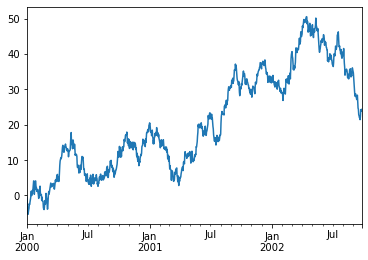

In [61]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 432x288 with 0 Axes>

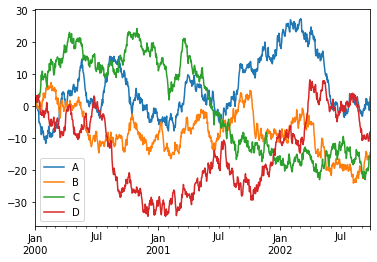

In [62]:
import matplotlib.pyplot as plt

pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
pdf = pdf.cumsum()
plt.figure(); pdf.plot(); plt.legend(loc='best')